#**About Dataset**

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

**n** the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the **UW CS ftp server:**

**ftp ftp.cs.wisc.edu**

**cd math-prog/cpo-dataset/machine-learn/WDBC/**

Also can be found on UCI Machine Learning Repository:

 https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

**Attribute Information:**

1) ID number

2) Diagnosis (M = malignant, B = benign)

3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance,

**field 3 is Mean Radius,**

**field 13 is Radius SE,**

**field 23 is Worst Radius.**

All feature values are recoded with four significant digits.

**Missing attribute values:**  **none**


**Class distribution:**

**357 benign,**

**212 malignant**

#**Import the Libraries**

In [31]:
## import some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#**Data Collection and Preprocessing**

In [32]:
# Loading the data from sklearn
breast_cancer_data = load_breast_cancer()
print(breast_cancer_data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [33]:
# Loading the dataset to a DataFrame
df = pd.DataFrame(breast_cancer_data.data, columns = breast_cancer_data.feature_names)

In [34]:
# Display the first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [35]:
# Adding the 'target' column to the data frame
df['label'] = breast_cancer_data.target

In [36]:
# Display the last few rows
print("last 5 rows of the dataset:")
df.tail()

last 5 rows of the dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [37]:
# Numbers of rows and columns in the dataset
df.shape   # Outputs the number of rows and columns in the dataset.

(569, 31)

In [38]:
# Getting some informations about the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [39]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64


In [40]:
# Statistical description of the dataset
print("\nStatistical Description of the Dataset:")
df.describe()



Statistical Description of the Dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [41]:
# Checking the distribution of Target Variable
print("\nStatistical Distribution of the Dataset:")
df['label'].value_counts()


Statistical Distribution of the Dataset:


,count
label,
1,357
0,212


**1 ---> Benign**

**0 ---> Malignant**

In [42]:
# Checking the Mean distribution of Target Variable
print("\nMean Distribution of the Dataset:")
df.groupby('label').mean()


Mean Distribution of the Dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


**Splitting the dataset into Features & Target**

In [43]:
# Splitting the dataset into Features & Target
X = df.drop(columns="label", axis=1)
y = df["label"]

In [44]:
print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

Features (X):
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  

#**Splitting the dataset into Training and Test sets**

In [45]:
# Splitting the dataset into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)
print("\nDataset split completed:")
print(f"Total samples: {X.shape[0]}, Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")


Dataset split completed:
Total samples: 569, Training samples: 426, Test samples: 143


In [46]:
# checking the number of Test and Train dataset
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (426, 30) (143, 30)


**Standardize the Data**

To have a better accuracy

In [47]:
# Standardize the Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

#**Building Neural Network**

In [48]:
# Importing tensorflow and Keras
import tensorflow as tf  #  Imports TensorFlow for deep learning tasks.
tf.random.set_seed(2)    #  Ensures reproducibility by setting a fixed random seed.
from tensorflow import keras # Imports Keras, a high-level API for building models.

**Defining the Neural Network**

In [49]:
# Setting up the layers of Neural Network i.e layers are stacked in order.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),     # Input layer
    keras.layers.Dense(15, activation='relu'),   # Hidden layer
    keras.layers.Dense(2, activation='sigmoid')  # Output layer  (for binary classification)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Compiling the Model**

In [50]:
# Compiling the Neural Network
model.compile(optimizer='adam',    # Adapts the learning rate dynamically for efficient training
              loss='sparse_categorical_crossentropy',   # Suitable for multi-class classification with integer labels
              metrics=['accuracy'])   # Tracks accuracy as a performance measure.

**Training the Neural Network**

In [51]:
# Training the Neural Network
history = model.fit(X_train_std, y_train, validation_split=0.2, epochs=30)

Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.6090 - loss: 0.6545 - val_accuracy: 0.7907 - val_loss: 0.4786
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7751 - loss: 0.5201 - val_accuracy: 0.8837 - val_loss: 0.3969
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8603 - loss: 0.4298 - val_accuracy: 0.8721 - val_loss: 0.3402
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8888 - loss: 0.3625 - val_accuracy: 0.9070 - val_loss: 0.2968
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9066 - loss: 0.3113 - val_accuracy: 0.9186 - val_loss: 0.2626
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9115 - loss: 0.2711 - val_accuracy: 0.9302 - val_loss: 0.2340
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9221 - loss: 0.2379 - val_accuracy: 0.9302 - val_loss: 0.2097
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9297 - loss: 0.2108 - val_accuracy: 0.9302 - va

#**Visualizing the Accuracy and Loss**

<function matplotlib.pyplot.show(close=None, block=None)>

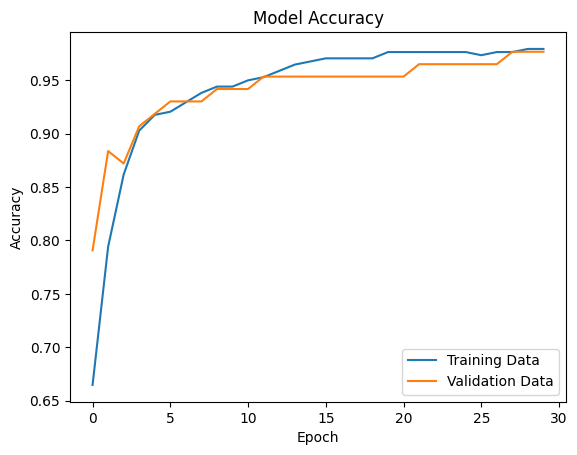

In [67]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='lower right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

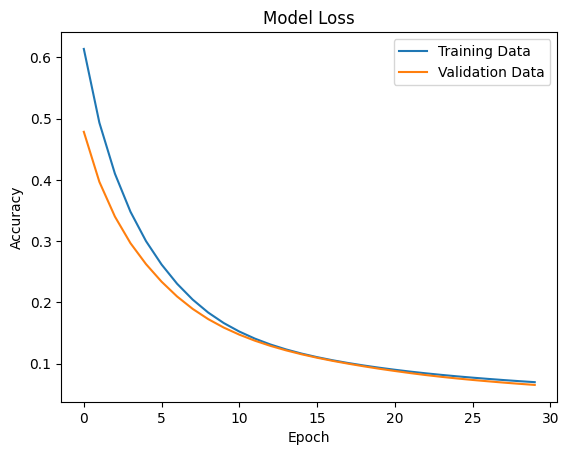

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='upper right')
plt.show

#**Accuracy of the model on the test data**

In [54]:
loss, accuracy = model.evaluate(X_test_std, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9733 - loss: 0.0874 
Test Loss: 0.0849
Test Accuracy: 0.9720


In [55]:
print(X_test_std.shape)
print(X_test_std[0])

(143, 30)
[-0.98869758 -0.05490434 -0.92244485 -0.86301917 -0.03900561  0.14098921
 -0.32429982 -0.58388863  0.3240024   0.20834695  0.12688657 -0.03233397
  0.23186449 -0.2935181   0.08914785  0.51865937  0.02865148  0.26947621
  1.6326098  -0.21472098 -0.89972687 -0.43542054 -0.85362841 -0.78926423
 -0.55582537 -0.05988329 -0.40699553 -0.55294671  0.0164612  -0.49605365]


In [56]:
print(X_test_std)

[[-0.98869758 -0.05490434 -0.92244485 ... -0.55294671  0.0164612
  -0.49605365]
 [ 0.11653984  0.03953408  0.09255937 ... -0.30604986 -0.7093938
  -0.5623045 ]
 [-0.71590361 -0.03311086 -0.72245203 ... -0.73974756  0.1634894
  -0.12365973]
 ...
 [ 0.57775851 -0.7522957   0.58237919 ...  0.12557556  0.3461139
   0.23751428]
 [-0.95776218  0.29379135 -0.91350208 ... -0.45318144 -0.50200666
   0.09913548]
 [ 1.15428184 -0.07427632  1.08642614 ...  0.90267896 -0.18163995
  -0.16960791]]


In [57]:
y_pred = model.predict(X_test_std)
print(y_pred.shape)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step
(143, 2)


In [58]:
print(y_pred)

[[3.57215777e-02 7.41986454e-01]
 [1.99490279e-01 5.73898792e-01]
 [4.48868610e-02 8.17107379e-01]
 [2.74435547e-03 8.94080222e-01]
 [8.69804561e-01 6.09328644e-03]
 [2.47035716e-02 7.39132941e-01]
 [3.72086503e-02 8.60874057e-01]
 [8.61455314e-03 8.87870133e-01]
 [3.52545665e-03 9.20487583e-01]
 [2.23437659e-02 8.07358384e-01]
 [5.80588654e-02 9.26565647e-01]
 [9.39659655e-01 9.99560878e-02]
 [3.95332975e-03 8.66020858e-01]
 [3.69250849e-02 6.90721035e-01]
 [2.60007405e-03 8.47810149e-01]
 [5.56167960e-02 9.13409352e-01]
 [1.61812473e-02 8.48328173e-01]
 [1.27974723e-03 7.99635708e-01]
 [9.84752953e-01 4.63551795e-03]
 [1.09801151e-01 7.87515581e-01]
 [1.30850496e-02 8.55737805e-01]
 [2.15760674e-02 8.45022202e-01]
 [7.62975067e-02 7.85981894e-01]
 [1.91390082e-01 2.12626547e-01]
 [1.66813824e-02 7.97915936e-01]
 [2.10239692e-03 9.10601139e-01]
 [2.94887703e-02 8.81981432e-01]
 [9.89635229e-01 5.22332208e-04]
 [9.85263050e-01 3.71050537e-02]
 [2.77254600e-02 6.87049329e-01]
 [3.629687

In [59]:
print(y_pred[0])

[0.03572158 0.74198645]


**model.predict() gives the prediction probability of each class for that data point**

In [61]:
# Example on argmax function
my_list = [0.8, 0.2]
max_index = np.argmax(my_list)
print(max_index)

0


In [62]:
# Converting the prediction probability to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
print(y_pred_labels)

[1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1
 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0
 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1
 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0]


**OR**

In [63]:
# Converting the prediction probability to class labels
y_pred_labels = [np.argmax(pred) for pred in y_pred]
print(y_pred_labels)

[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0]


#**Building the Predictive System**

In [64]:
input_data = [13,21.82,87.5,519.8,0.1273,0.1932,0.1859,0.09353,0.235,0.07389,0.3063,1.002,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.2,739.3,0.1703,0.5401,0.539,0.206,0.4378,0.1072]

# Converting input data to a NumPy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)

# Making a prediction
prediction = model.predict(std_data)
print(prediction)

# Converting the prediction probability to class label
predicted_class = np.argmax(prediction)
print(predicted_class)

if predicted_class == 0:
    print("The Breast Cancer(Tumor) is Malignant")
else:
    print("The Breast Cancer(Tumor) is Benign")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[0.9478745  0.10569824]]
0
The Breast Cancer(Tumor) is Malignant


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [65]:
input_data = [8.196,16.84,51.71,201.9,0.086,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.01646,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.1297,0.1357,0.0688,0.02564,0.3105,0.07409]

# Converting input data to a NumPy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshaping the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)

# Making a prediction
prediction = model.predict(std_data)
print(prediction)

# Converting the prediction probability to class label
predicted_class = np.argmax(prediction)
print(predicted_class)

if predicted_class == 0:
    print("The Breast Cancer(Tumor) is Malignant")
else:
    print("The Breast Cancer(Tumor) is Benign")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[0.00184447 0.9527198 ]]
1
The Breast Cancer(Tumor) is Benign


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
